# Plot the averaged limits

For each source and pseudo experiment the credible intevals according to a credible level are calculated and averaged over all pseudo experiments, Figure 12.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astropy.table import Table
from scipy.integrate import quad
from scipy.optimize import curve_fit, newton, root
from scipy.interpolate import interp1d

from glob import glob
from pathlib import Path
import os
import sys

sys.path.append("../src")
import plot_utils
from fill_table import *

from configure_analysis import AnalysisConfig
analysisconfig = AnalysisConfig()

%matplotlib inline
plot_utils.mpl_settings()

Use the `fill_table` function to generate `csv` files with the quantiles or upper limits. This might take a while.

In [2]:
for i in [0.68, 0.90]:
    print(f"q = {i}")
    fill_table(["HESSJ1908", "RXJ1713", "VelaX", "Westerlund1"], q=i)

q = 0.68
Finished HESSJ1908 - 0 - comb
Finished HESSJ1908 - 1 - comb
Finished RXJ1713 - 0 - comb
Finished RXJ1713 - 1 - comb
Finished VelaX - 0 - comb
Finished VelaX - 1 - comb
Finished Westerlund1 - 0 - comb
Finished Westerlund1 - 1 - comb
q = 0.9
Finished HESSJ1908 - 0 - comb
Finished HESSJ1908 - 1 - comb
Finished RXJ1713 - 0 - comb
Finished RXJ1713 - 1 - comb
Finished VelaX - 0 - comb
Finished VelaX - 1 - comb
Finished Westerlund1 - 0 - comb
Finished Westerlund1 - 1 - comb
CPU times: total: 7min 5s
Wall time: 7min 8s


## Generating plot from saved quantiles

In [3]:
result_q68 = pd.read_csv(analysisconfig.get_file("likelihood_analysis/results_q68.csv"), index_col=0)
result_q90 = pd.read_csv(analysisconfig.get_file("likelihood_analysis/results_q90.csv"), index_col=0)

The plot shows the summary of results for all sources and input models. The blue and red horizontal bars show the 68% and 90% quantile intervals of the distribution of best-fit values for the leptonic (finput = 0) and hadronic (finput = 1) input models, respectively. The black bars indicate the average position and sizes of the 68% credible intervals derived for each input model.

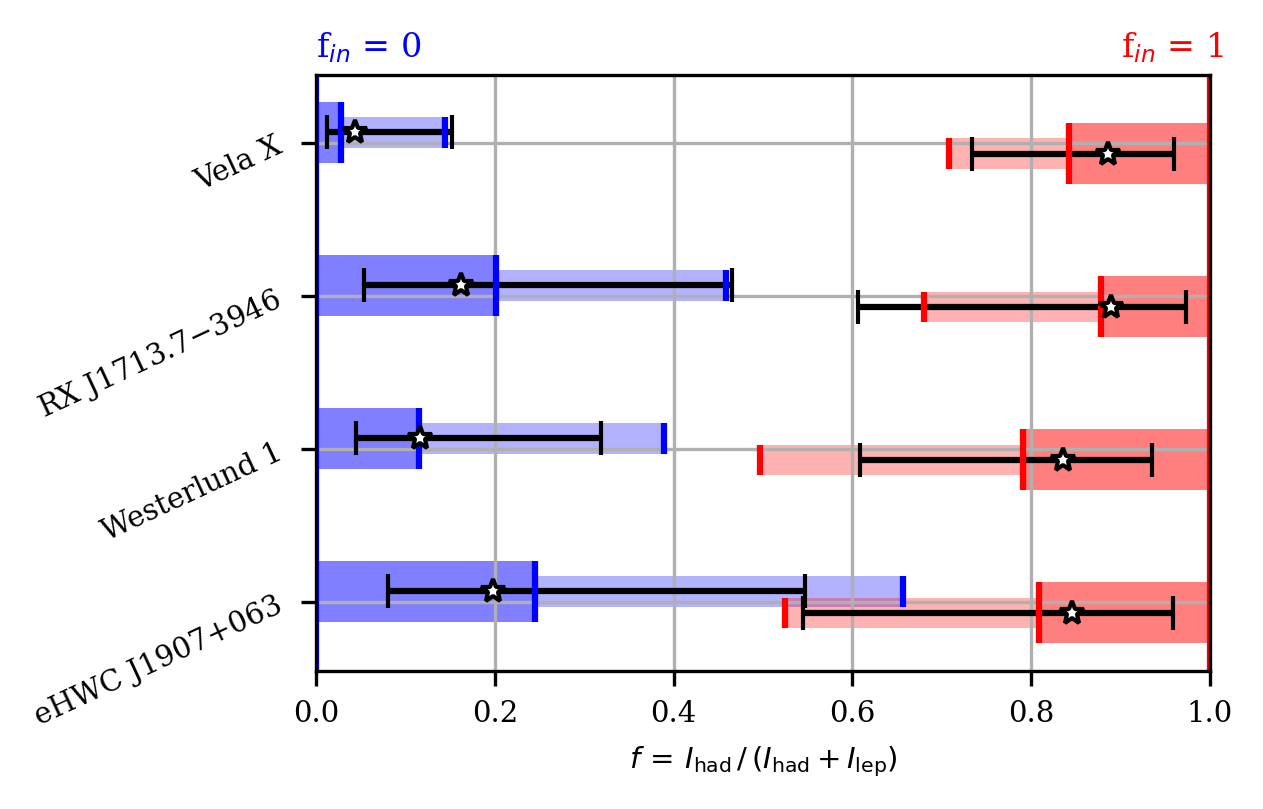

In [12]:
pos_dict = {'VelaX': 3, 'RXJ1713': 2, 'HESSJ1908': 0, 'Westerlund1': 1}
ylabels = [r"Vela X", r"RX J1713.7$-$3946", r"eHWC J1907+063", r"Westerlund 1"]

plt.rcParams.update({
    'font.family': 'serif',
    # 'text.usetex': True,
    # 'text.latex.preamble': r'\usepackage{txfonts}',
    'font.size': 7.0
})

fig_width = 8.8 / 2.54
ax_width = 0.86
fig_height = 2.6
ax_height = fig_width * ax_width / 1.5 / fig_height

fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=300)
ax.set_position([0.13, 0.15, ax_width, ax_height])

for key in result_q68.index:
    fin, favg, fn68, fp68, _, _, _, fq68 = result_q68.loc[key]
    _, _, fn90, fp90, _, _, _, fq90 = result_q90.loc[key]

    sname = key.split("_")[0]
    if fin == 0:
        color = "blue"
        offset = 0.07
        left = 0
        fq68b = fq68
        fq90b = fq90 - fq68b
    elif fin == 1:
        color = "red"
        offset = -0.07
        left = 1
        fq68b = fq68 - 1
        fq90b = fq90 - 1 - fq68b
    else:
        color = "k"
    ax.errorbar(
        favg,
        pos_dict[sname] + offset,
        marker="*",
        markerfacecolor="white",
        xerr=[[fn68], [fp68]],
        capsize=4,
        color="k",
        alpha=1,
    )
    ax.barh(pos_dict[sname] + offset, fq68b, 0.4, alpha=0.5, left=left, color=color)
    ax.barh(pos_dict[sname] + offset, fq90b, 0.2, alpha=0.3, left=fq68, color=color)
    q_size = 0.2
    ax.vlines(
        fq68,
        pos_dict[sname] + offset - q_size,
        pos_dict[sname] + offset + q_size,
        color=color,
        alpha=1,
    )
    q_size = 0.1
    ax.vlines(
        fq90,
        pos_dict[sname] + offset - q_size,
        pos_dict[sname] + offset + q_size,
        color=color,
        alpha=1,
    )

ax.grid()
ax.set_xlabel(r"$f\,=\,I_\mathrm{had}\,/\,(I_\mathrm{had} + I_\mathrm{lep})$")
ax.set_yticks(list(pos_dict.values()))
ax.set_yticklabels(ylabels, rotation=25)
ax.text(0,1.03,"f$_{in}$ = 0", transform=ax.transAxes, color='blue', fontsize=8)
ax.text(0.90,1.03,"f$_{in}$ = 1", transform=ax.transAxes, color='red', fontsize=8)
ax.axvline(0, color="blue")
ax.axvline(1, color="red")

plt.show()

In [7]:
#Store files in `data` folder
for form in ["png", "pdf"]:
    fig.savefig(analysisconfig.get_file("likelihood_analysis/plots/limit_avg_comb."+form), bbox_inches="tight")